<a href="https://colab.research.google.com/github/Hristo2076/Big_Data_analysis/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Цель:** Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [1]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cross_val_score(LogisticRegression(), x_data_generated,y_data_generated, scoring='accuracy').mean()

0.8799999999999999

In [17]:
x_data_generated[:5]

array([[-2.23560632,  0.75819161,  0.63962732, -0.82864476, -0.03188061,
        -1.30857835,  0.69531399, -0.80244007,  1.53385361, -1.13796336,
         1.7777775 ,  0.77166465,  0.18771356, -0.62632492, -1.11429799,
         0.21949485, -0.44185892,  0.47459412,  0.43839429,  0.25747369],
       [-0.53573343,  0.22621618, -0.90299456, -0.86143228, -0.91559512,
        -0.05963481, -1.37153156,  2.27335346,  0.14979783, -1.03718575,
        -0.12110307,  0.46538106, -0.43662281,  0.98511144, -0.37726844,
        -0.21160546,  0.62767007, -1.69898684,  0.41566612,  0.85350954],
       [ 0.54384803, -1.48285771, -2.99933449,  0.42948851,  0.27018027,
         0.67049388, -2.44405026,  1.19971471, -0.82208161, -0.25827629,
         1.38293882,  0.72819747, -0.82843886,  1.89535773,  0.45204673,
        -1.23500204,  0.65904233, -0.0710079 , -2.58453102,  1.28207345],
       [-0.65799023, -0.24498924,  0.40501807,  0.69080095, -0.11489833,
         0.24381565,  1.43423657, -0.20240655,  

3. Используйте статистические методы для отбора признаков:
  1. Выберите признаки на основе матрицы корреляции.
  2. Отсеките низковариативные признаки (VarianceThreshold).
  3. Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

<Axes: >

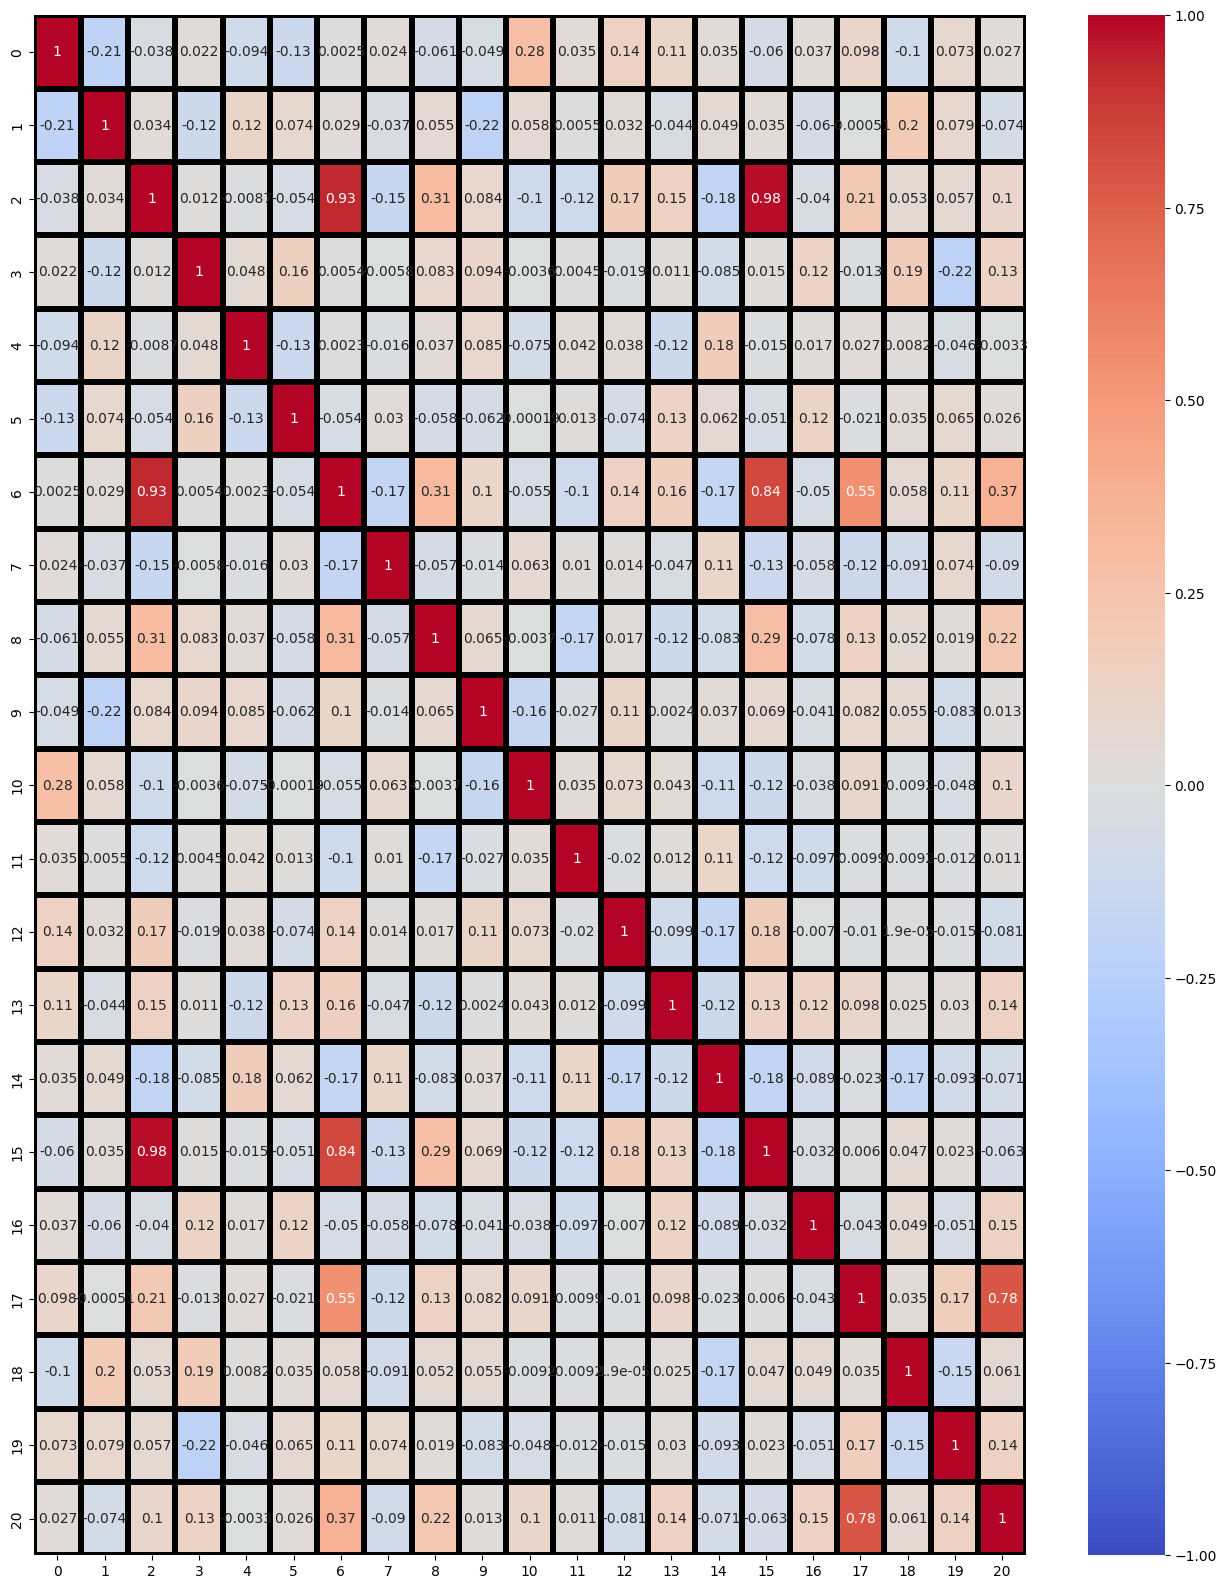

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
fig, ax = plt.subplots(figsize=(16,20))


corr_ = pd.DataFrame(np.column_stack((x_data_generated, y_data_generated))).corr()

sns.heatmap(corr_, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=3,linecolor='black', ax=ax)


In [47]:
df = pd.DataFrame(np.column_stack((x_data_generated, y_data_generated)))
df = df.loc[:, (df.columns != 2) & (df.columns != 15)]
df.shape

(100, 19)

In [48]:
from sklearn.feature_selection import VarianceThreshold




var = VarianceThreshold(threshold=1.)
data = var.fit_transform(df)
data.shape

(100, 8)

In [49]:
data = pd.DataFrame(data)
data.head(1)

,0,1,2,3,4,5,6,7
0,0.695314,-0.80244,-1.137963,-0.626325,-1.114298,0.474594,0.438394,0.257474


In [50]:

X = data
y = y_data_generated

In [51]:
cross_val_score(LogisticRegression(), X, y, scoring="accuracy").mean()

0.9

4. Осуществите отбор признаков на основе дисперсионного анализа:

  1. Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

  2. Повторите п. 2 на отобранных признаках.

In [27]:
from sklearn.feature_selection import SelectKBest,f_classif

X1 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)

X1.shape

(100, 5)

In [28]:

cross_val_score(LogisticRegression(), X1, y_data_generated, scoring="accuracy").mean()

0.9199999999999999

5. Отбор с использованием моделей:

  1. Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

  2. Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

  3. Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [29]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [30]:

svm = LinearSVC(C=0.1, penalty="l1", dual=False).fit(x_data_generated, y_data_generated)
model = SelectFromModel(svm, prefit=True)
X_2 = model.transform(x_data_generated)

X_2.shape

(100, 6)

In [31]:
cross_val_score(LogisticRegression(), X_2, y_data_generated, scoring="accuracy").mean()

0.93

In [39]:
clf = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0, max_features=5)
clf.fit(x_data_generated, y_data_generated)

for i in range(20):
    print(f"{pd.DataFrame(x_data_generated).columns[i]}\t- {clf.feature_importances_[i]:.4f}")



0	- 0.0233
1	- 0.0205
2	- 0.0128
3	- 0.0286
4	- 0.0248
5	- 0.0199
6	- 0.0699
7	- 0.0242
8	- 0.0330
9	- 0.0300
10	- 0.0356
11	- 0.0053
12	- 0.0292
13	- 0.0183
14	- 0.0046
15	- 0.0388
16	- 0.0329
17	- 0.5143
18	- 0.0177
19	- 0.0162


In [41]:
X_3 = pd.DataFrame(x_data_generated)[[17,6,16,15,10,9,8]]


cross_val_score(clf, X_3, 
                y_data_generated,
                scoring="accuracy").mean()

0.9

6. Перебор признаков:

  1. SequentialFeatureSelector.

  2. Повторите п. 2 на отобранных признаках.

In [34]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector

In [35]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, 
                                   num=5))

ridge.fit(x_data_generated, y_data_generated)


RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06]))

In [36]:
sfs = SequentialFeatureSelector(ridge, 
                                n_features_to_select=2, 
                                direction="forward")

sfs.fit(x_data_generated, y_data_generated)

SequentialFeatureSelector(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                          n_features_to_select=2)

In [37]:
feature_names = np.array(pd.DataFrame(x_data_generated).columns)
names = feature_names[sfs.get_support()]
print(names)

[16 17]


In [38]:
X_4 = pd.DataFrame(x_data_generated)[[16, 17]]

cross_val_score(LogisticRegression(), X_4,
                y_data_generated, 
                scoring="accuracy").mean()

0.93

7. Сформулируйте выводы по проделанной работе:
  1. Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [52]:
d = {'standart':[20,0.88],
     'with_corr':[8,0.9],
     'SelectKBest':[5,0.92],
     'SelectFromModel':[6,0.93],
     'RandomForestClassifier':[5,0.93]}

     
res = pd.DataFrame(data=d,index=('shape','acu'))
res

,standart,with_corr,SelectKBest,SelectFromModel,RandomForestClassifier
shape,20.00,8.0,5.00,6.00,5.00
acu,0.88,0.9,0.92,0.93,0.93


Все методы показали себя с весьма хорошей стороны и только повышали `accuracy`, но лучше всех справелись методы с применением Ml-модели `RandomForest` и `SelectFromModel`. Они улчушели предсказания на 5%!